# Feature Engineering: Traditional Engineering Models

In [31]:
## Building a corpus of documents
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from importlib import reload

pd.options.display.max_colwidth = 200
%matplotlib inline

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages, and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!']

labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus_df = pre.corpus_df(corpus, labels)
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages, and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


## Bag of Words Model

In [2]:
import preprocessing as pre
import nlptradition as tr

# normalize the corpus
norm_corpus = pre.normalize_corpus(corpus)

# get bag of words features in sparse format
cv_matrix = tr.bag_of_words(norm_corpus)

# view non-zero feature positions in the sparse matrix
print(cv_matrix)

(0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [3]:
# view dense representation
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [4]:
tr.bag_of_words(norm_corpus, show_doc_feat=True)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Bag of N-Grams Models

In [5]:
tr.bag_of_ngrams(norm_corpus, show_doc_feat=True)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Model

In [6]:
# using TfidfTransformer
tr.tfidf(norm_corpus, show_doc_feat=True, type='transformer')

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [7]:
# using TfidfVectorizer
tr.tfidf(norm_corpus, show_doc_feat=True, type='vectorizer')

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## Extracting Features for New Documents

In [8]:
new_doc = 'the sky is green today'

# creating dataframe for new document
def newdoctransform(obj, doc):
    transform = obj.transform([new_doc])
    transform = transform.toarray()
    transform = np.round(transform, 2)
    vocab = obj.get_feature_names()
    df = pd.DataFrame(transform, columns = vocab)
    return df

# using bag of words
tv_obj = tr.tfidf(norm_corpus, needobj=True, type='vectorizer')
newdoctransform(tv_obj, new_doc)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity

In [9]:
# pairwise document similarity matrix (cosine similarity)
tr.pairwise_doc_similar(norm_corpus)

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


## Document Clustering with Similarity Features

In [24]:
# linkage matrix for our corpus
tr.linkage_matrix(norm_corpus, show_matrix=True)

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


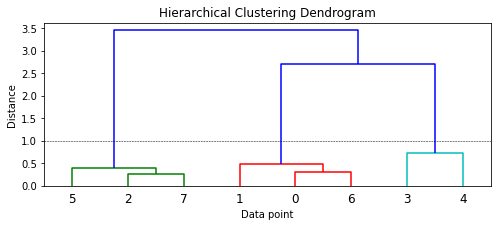

In [28]:
# show matrix as a dendrogram
from scipy.cluster.hierarchy import dendrogram

Z = tr.linkage_matrix(norm_corpus)

plt.figure(figsize=(8,3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [33]:
# get cluster labels
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

# get labels
cluster_labels = fcluster(Z, max_dist, criterion='distance')
# create df
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
# merge df
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages, and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Topic Models

In [36]:
tr.lda(norm_corpus, features=True, feat_columns=['T1', 'T2', 'T3'])

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [40]:
topics = tr.lda(norm_corpus, constituents=True)

for topic in topics:
    print(topic)
    print()

[('sky', 4.3324394424701325), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]

